# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Ikram Sabila Rasyad
- **Email:** ikramsabila@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan jumlah penyewaan sepeda berdasarkan kondisi cuaca tertentu (cerah, berkabut, hujan ringan, hujan lebat) dalam periode Januari 2011 hingga Desember 2012, dan seberapa besar perbedaan jumlah penyewaan antara masing-masing kondisi? 
- Pada jam berapa dalam sehari jumlah penyewaan sepeda mencapai puncak dan titik terendah berdasarkan data dari Januari 2011 hingga Desember 2012, serta bagaimana pola ini dapat membantu dalam pengelolaan layanan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [5]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Pada data 'day' diketahui memiliki jumlah baris mencapai 731 baris 
- Pada data 'day' diketahui memiliki jumlah baris mencapai 17379 baris

### Assessing Data

In [7]:
# Menilai data day.csv
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Menilai data hour.csv
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
print("Jumlah data duplikat: ", df_hour.duplicated().sum())

Jumlah data duplikat:  0


In [13]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada data df_day kolom "dteday" memiliki tipe data yang tidak sesuai.
- Pada data df_hour kolom "dteday" memiliki tipe data yang tidak sesuai.

In [15]:
Q1 = df_day['cnt'].quantile(0.25)
Q3 = df_day['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
total_outliers = ((df_day['cnt'] < lower_bound) | (df_day['cnt'] > upper_bound)).sum()
print(total_outliers)

0


In [16]:
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
total_outliers = ((df_hour['cnt'] < lower_bound) | (df_hour['cnt'] > upper_bound)).sum()
print(total_outliers)

505


**Insight:**
- Sebelumnya saya mendapatkan banyak sekali outlier pada data hour akan tetapi dikarenakan kita akan hanya menjawab pertanyaan yeng berkaitan dengan jumlah penyewa jdai untuk mempersingkat waktu cukup mengecek pada column "Cnt" saja.

### Cleaning Data

In [17]:
datetimes_column = ['dteday']
for column in datetimes_column:
    df_day[column] = pd.to_datetime(df_day[column])

In [18]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
datetimes_column = ['dteday']
for column in datetimes_column:
    df_hour[column] = pd.to_datetime(df_hour[column])

In [20]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
# Winsorize Outlier dengan nilai ambang batas
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_hour['cnt'] = df_hour['cnt'].clip(lower=lower_bound, upper=upper_bound)

In [22]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119.0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89.0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90.0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61.0


**Insight:**
- Pada tahap ini data pada hour dan day akan dilakukan perubahan pada type data column dteday menjadi timestamp
- Kemudian pada penanganan Outlier, kita hanya perlu menanganinya dengan mengubah nilai yang berada diluar outlier dengan nilai ambang batas, dengan menggunakan metode winsorize maka tidak perlu menghapus data tersebut dengan demikian kita tidak akan kehilangan mutu pada data tersebut.

## Exploratory Data Analysis (EDA)

### Explore data day : Hubungan antara cuaca dengan jumlah penyewa

In [23]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [24]:
df_day.groupby(by='weathersit').agg({
    'cnt' : ['sum', 'max', 'min', 'mean'] 
})

cnt                        
                sum   max  min         mean
weathersit                                 
1           2257952  8714  431  4876.786177
2            996858  8362  605  4035.862348
3             37869  4639   22  1803.285714

In [25]:
df_day['weathersit'].value_counts(normalize=True) * 100

weathersit
1    63.337893
2    33.789330
3     2.872777
Name: proportion, dtype: float64

### Explore data hour : Hubungan antara jam dengan jumlah penyewa

In [26]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,186.361327
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.500000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,171.931168


In [27]:
df_hour.groupby(by='hr').agg({
    'cnt' : ['sum', 'mean', 'max', 'min']
}).sort_values(('cnt', 'sum'), ascending=False)

cnt                         
         sum        mean    max   min
hr                                   
17  313264.5  429.129452  642.5  15.0
18  292179.5  401.345467  642.5  23.0
8   252312.5  347.059835  642.5   5.0
16  227239.0  311.286301  642.5  11.0
19  226390.0  310.975275  642.5  11.0
13  183906.5  252.272291  642.5  11.0
12  183573.5  252.161401  642.5   3.0
15  182524.5  250.376543  642.5   7.0
14  175033.5  240.100823  642.5  12.0
20  164550.0  226.030220  567.0  11.0
9   159438.0  219.309491  426.0  14.0
7   154171.0  212.064649  596.0   1.0
11  151295.0  208.108666  642.5  10.0
10  126257.0  173.668501  539.0   8.0
21  125445.0  172.314560  584.0   6.0
22   95612.0  131.335165  502.0   9.0
23   63941.0   87.831044  256.0   2.0
6    55132.0   76.044138  213.0   1.0
0    39130.0   53.898072  283.0   2.0
1    24164.0   33.375691  168.0   1.0
2    16352.0   22.869930  132.0   1.0
5    14261.0   19.889819   66.0   1.0
3     8174.0   11.727403   79.0   1.0
4     4428.0    6.352941   28.0   1.0

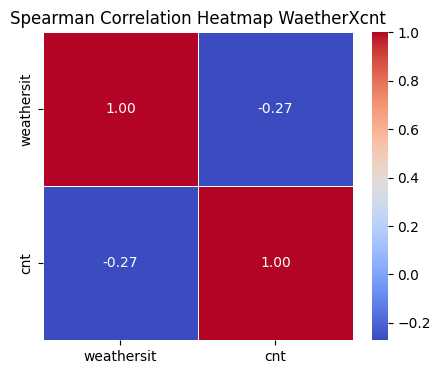

In [28]:
corr_matrix = df_day[['weathersit', 'cnt']].corr(method='spearman')
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap WaetherXcnt")
plt.show()

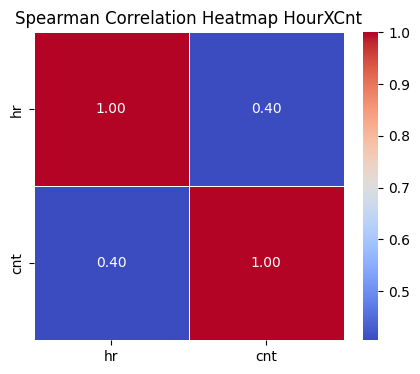

In [29]:
corr_matrix = df_hour[['hr', 'cnt']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap HourXCnt")
plt.show()

**Insight:**
- Pada hasil analisis cuaca dengan penyewa didapatkan bahwa jumlah penyewa sepeda mencapai 2257952 orang pada cuaca yang cerah dengan presentase dari tiap musim mencapai 63,3%. Dari hasil ini juga didapatkan bahwa hubungan antara cuaca dengan jumlah penyewa sekitar 20%.
- Adapun pada analisis jam peminjaman dengan penyewa mendapat hasil berupa pada pukul 17 sore jumlah penyewa mencapai puncaknya dengan jumlah maksimal perharinya 642 penyewa dan minimal mencapai 15 penyewa, dan untuk waktu paling sepi adalah pada pukul 04 pagi dengan jumlah maximal mencapai 28 penyewa dan minimal 1 penyewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh kondisi cuaca pada jumlah penyewa

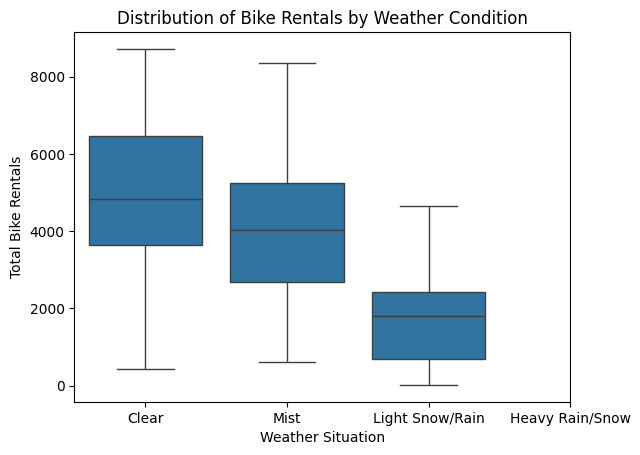

In [30]:
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.xticks([0,1,2,3], ['Clear', 'Mist', 'Light Snow/Rain','Heavy Rain/Snow'])
plt.xlabel("Weather Situation")
plt.ylabel("Total Bike Rentals")
plt.title("Distribution of Bike Rentals by Weather Condition")
plt.show()

**Insight:**
- pada bagian ini saya menggunakan boxplot dalam memberikan gambaran informasi mengenai jumlah penyewa ada tiap kondisi cuaca.
- Dari visualisasi yang dihasilkan, terlihat bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca yang lebih cerah (weathersit = 1), sedangkan pada kondisi cuaca yang lebih buruk (weathersit = 3 atau 4), jumlah penyewaan cenderung menurun.
- Penyebaran data juga menunjukkan adanya beberapa outlier, terutama pada kondisi cuaca yang lebih baik, yang menunjukkan bahwa pada beberapa hari tertentu terjadi lonjakan penyewaan sepeda yang signifikan.

### Pertanyaan 2: Pengaruh jam penyewaan terhadap penyewa

C:\Users\ikram\AppData\Local\Temp\ipykernel_10376\509546378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour_grouped, x='hr', y='cnt', palette='dark:salmon_r')


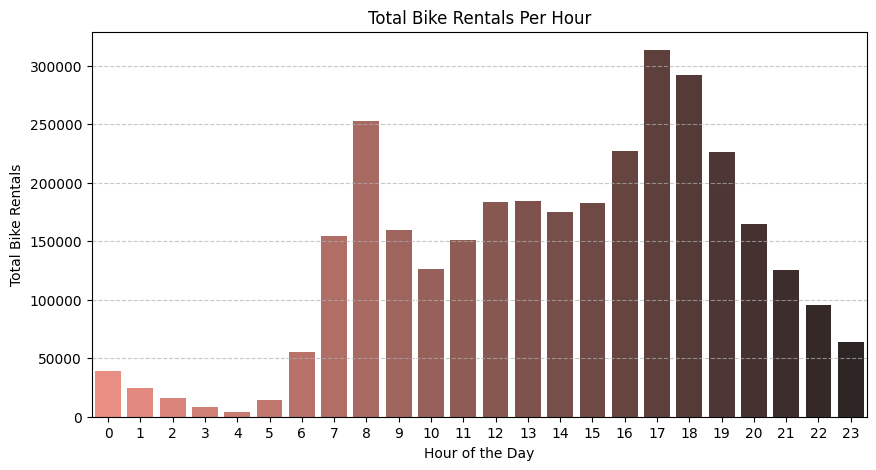

In [31]:
df_hour_grouped = df_hour.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_hour_grouped, x='hr', y='cnt', palette='dark:salmon_r')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Bike Rentals")
plt.title("Total Bike Rentals Per Hour")
plt.xticks(range(0, 24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- Bar chart dipilih karena dapat dengan mudah menampilkan distribusi jumlah penyewaan sepeda di setiap jam secara jelas dan terstruktur.
- Penyewaan sepeda memiliki dua puncak utama, yaitu pukul 8 pagi (perjalanan ke kantor/sekolah) dan pukul 17-18 sore (pulang kerja/sekolah). Penyewaan sangat rendah pada jam dini hari (0-5 pagi).Setelah pukul 18:00, jumlah penyewaan menurun bertahap hingga malam hari.

## Conclusion

Pengaruh Kondisi Cuaca terhadap Jumlah Penyewa
1. Cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda.
2. Pada cuaca cerah (weathersit = 1), jumlah penyewaan lebih tinggi dibandingkan dengan kondisi berkabut, hujan ringan, atau salju. Semakin buruk kondisi cuaca, semakin sedikit orang yang menyewa sepeda, kemungkinan karena kenyamanan dan faktor keselamatan. Strategi bisnis dapat menyesuaikan stok sepeda serta menawarkan insentif saat cuaca kurang mendukung untuk tetap menarik pelanggan.

Pengaruh Jam Penyewaan terhadap Jumlah Penyewa
1. Penyewaan sepeda menunjukkan dua puncak utama, yaitu sekitar pukul 8 pagi (waktu berangkat kerja/sekolah) dan pukul 17-18 sore (waktu pulang kerja/sekolah).
2. Pada jam dini hari (0-5 pagi), jumlah penyewaan sangat rendah karena aktivitas masyarakat yang terbatas.
3. Pola ini mengindikasikan bahwa sepeda sering digunakan sebagai transportasi utama dalam perjalanan harian. Pengelola dapat mengoptimalkan jumlah sepeda yang tersedia pada jam sibuk serta menawarkan promosi di jam sepi untuk meningkatkan penggunaan.

Kesimpulan Umum:
Kedua faktor ini—cuaca dan waktu penyewaan—sangat berpengaruh terhadap pola penggunaan sepeda. Untuk meningkatkan efisiensi layanan, diperlukan strategi yang menyesuaikan ketersediaan sepeda dengan tren penggunaan berdasarkan kondisi cuaca dan jam penyewaan. 

In [32]:
df_day.to_csv("data_ready_day.csv", index=False)
df_hour.to_csv("data_ready_hour.csv", index=False)